# SETUP

In [1]:
CONSIDER_RADIUS_AGE = False
OLDSCHOOL = True

In [2]:
import os
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from functions import *

In [3]:
# User-defined parameters
TC = 20                         # Increment value
UL = 150                        # Upper limit of parameter interval
DATA_SELECTION = 'ALL'          # Options: 'F', 'G', 'ALL'
PLANE = 'XY'                    # Options: 'XY', 'XZ', 'ZY'
B = 1000                        # Number of bootstrap samples
INTERVAL = 1                    # Grid interval
CL = 95                         # Confidence level
TRIMPCT = 20                    # Trim percentage
ALPHA = 0.01                    # Alpha for confidence intervals

ALL = pd.read_csv("data/ALLstars_with_radius_gaiadr3.csv")
F = pd.read_csv("data/Fstars_with_radius_gaiadr3.csv")
G = pd.read_csv("data/Gstars_with_radius_gaiadr3.csv")

ALL["vsin/radius"] = ALL["vsini"] / ALL["Rad"]
F["vsin/radius"] = F["vsini"] / F["Rad"]
G["vsin/radius"] = G["vsini"] / G["Rad"]

In [4]:
if CONSIDER_RADIUS_AGE:
    ALL = ALL.dropna(subset=['vsin/radius']).reset_index()
    ALL = ALL[ALL["Age"] != 0]
    F = F.dropna(subset=['vsin/radius']).reset_index()
    F = F[F["Age"] != 0]
    G = G.dropna(subset=['vsin/radius']).reset_index()
    G = G[G["Age"] != 0]

if OLDSCHOOL:
    import smplotlib
else:
    plt.rcParams.update({
        "xtick.top": True,
        "ytick.right": True,
        "xtick.direction": "in",
        "font.family": "Lato",
        "ytick.direction": "in",
        "font.size": 12,
        "axes.labelsize": 12,
        "axes.titlesize": 12,
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "xtick.minor.visible": True,
        "ytick.minor.visible": True
    })

In [5]:
OUTDIR = "figures"
if not os.path.exists(OUTDIR):
    os.makedirs(OUTDIR)

# JUST LOOKING THE DATA

In [6]:
ALL.shape, F.shape, G.shape

((6019, 238), (3450, 238), (2569, 238))

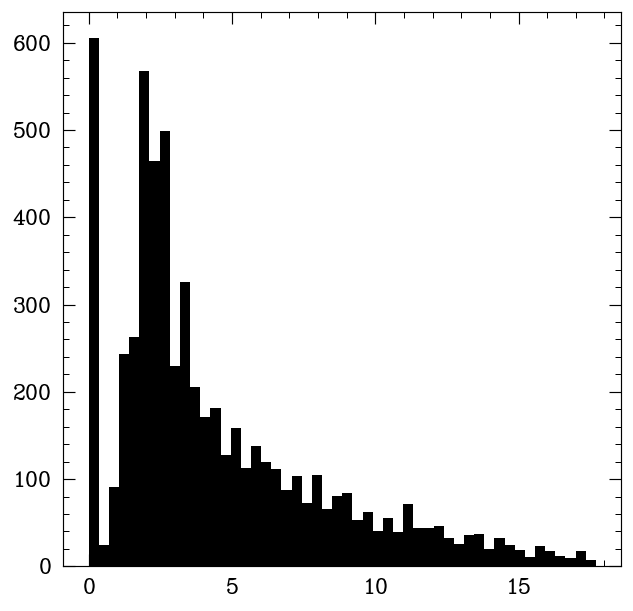

In [7]:
ALL["Age"].hist(bins=50, grid=False);

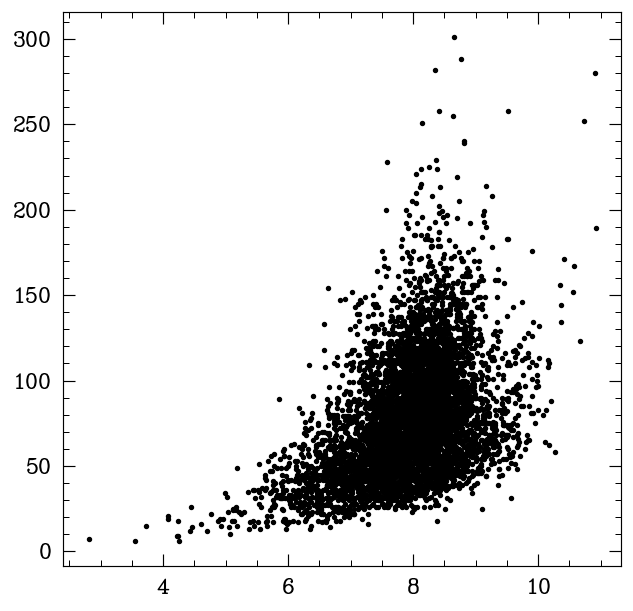

In [8]:
plt.scatter(ALL["Vmag"], ALL["Dist"], s=5)

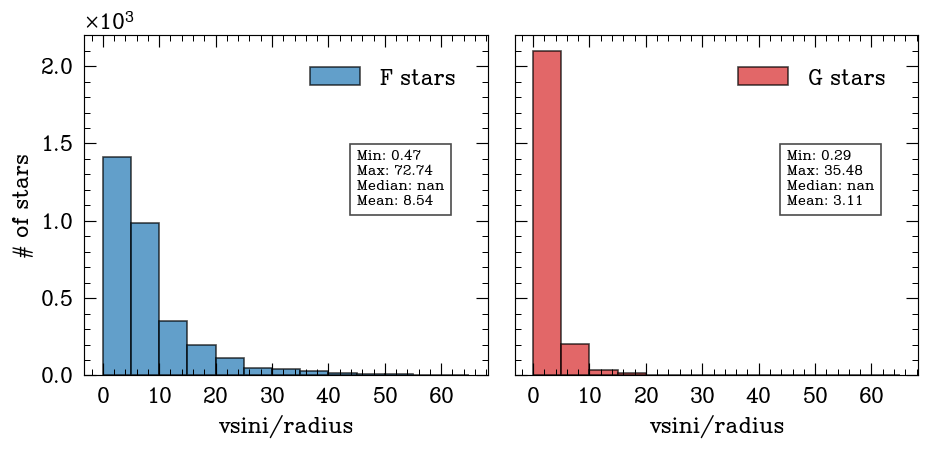

In [9]:
_, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,4))

bin_edges = np.arange(0, 70, 5)

ax[0].hist(F['vsin/radius'], bins=bin_edges, alpha=0.7, label='F stars', color="tab:blue", ec="k")
ax[1].hist(G['vsin/radius'], bins=bin_edges, alpha=0.7, label='G stars', color="tab:red", ec="k")

ax[0].set_ylabel('# of stars')

for a in ax:
    a.set_xlabel('vsini/radius') 
    a.set_xticks(np.arange(0,70,10))
    a.legend()

F_min, F_max = np.min(F['vsin/radius']), np.max(F['vsin/radius'])
F_median, F_mean = np.median(F['vsin/radius']), np.mean(F['vsin/radius'])

G_min, G_max = np.min(G['vsin/radius']), np.max(G['vsin/radius'])
G_median, G_mean = np.median(G['vsin/radius']), np.mean(G['vsin/radius'])

F_stats = f"Min: {F_min:.2f}\nMax: {F_max:.2f}\nMedian: {F_median:.2f}\nMean: {F_mean:.2f}"
G_stats = f"Min: {G_min:.2f}\nMax: {G_max:.2f}\nMedian: {G_median:.2f}\nMean: {G_mean:.2f}"

ax[0].text(45, 1100, F_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
ax[1].text(45, 1100, G_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout();

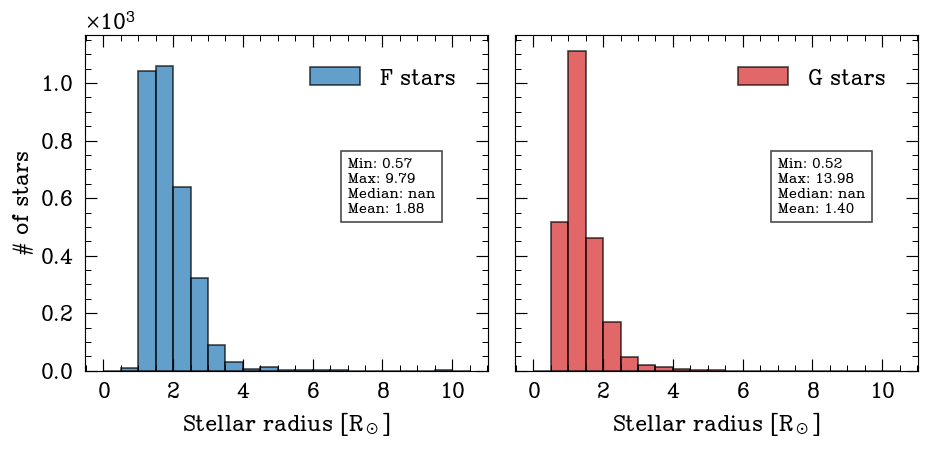

In [10]:
_, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,4))

bin_edges = np.arange(0, 11, 0.5)

ax[0].hist(F['Rad'], bins=bin_edges, alpha=0.7, label='F stars', color="tab:blue", ec="k")
ax[1].hist(G['Rad'], bins=bin_edges, alpha=0.7, label='G stars', color="tab:red", ec="k")

ax[0].set_ylabel('# of stars')

for a in ax:
    a.set_xlabel('Stellar radius [R$_\odot$]') 
    a.set_xticks(np.arange(0,12,2))
    a.legend()

F_min, F_max = np.min(F['Rad']), np.max(F['Rad'])
F_median, F_mean = np.median(F['Rad']), np.mean(F['Rad'])

G_min, G_max = np.min(G['Rad']), np.max(G['Rad'])
G_median, G_mean = np.median(G['Rad']), np.mean(G['Rad'])

F_stats = f"Min: {F_min:.2f}\nMax: {F_max:.2f}\nMedian: {F_median:.2f}\nMean: {F_mean:.2f}"
G_stats = f"Min: {G_min:.2f}\nMax: {G_max:.2f}\nMedian: {G_median:.2f}\nMean: {G_mean:.2f}"

ax[0].text(7, 550, F_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
ax[1].text(7, 550, G_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout();

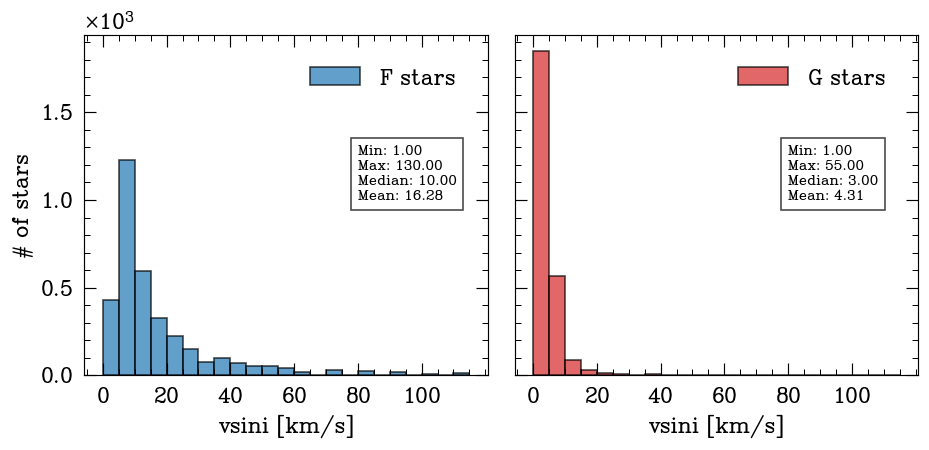

In [11]:
_, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,4))

bin_edges = np.arange(0, 120, 5)

ax[0].hist(F['vsini'], bins=bin_edges, alpha=0.7, label='F stars', color="tab:blue", ec="k")
ax[1].hist(G['vsini'], bins=bin_edges, alpha=0.7, label='G stars', color="tab:red", ec="k")

ax[0].set_ylabel('# of stars')

for a in ax:
    a.set_xlabel('vsini [km/s]') 
    a.set_xticks(np.arange(0,120,20))
    a.legend()

F_min, F_max = np.min(F['vsini']), np.max(F['vsini'])
F_median, F_mean = np.median(F['vsini']), np.mean(F['vsini'])

G_min, G_max = np.min(G['vsini']), np.max(G['vsini'])
G_median, G_mean = np.median(G['vsini']), np.mean(G['vsini'])

F_stats = f"Min: {F_min:.2f}\nMax: {F_max:.2f}\nMedian: {F_median:.2f}\nMean: {F_mean:.2f}"
G_stats = f"Min: {G_min:.2f}\nMax: {G_max:.2f}\nMedian: {G_median:.2f}\nMean: {G_mean:.2f}"

ax[0].text(80, 1000, F_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
ax[1].text(80, 1000, G_stats, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout();

# FIGURES

## FIGURE 1

>> Image successfully saved as 'fig1_FG.png' in figures folder


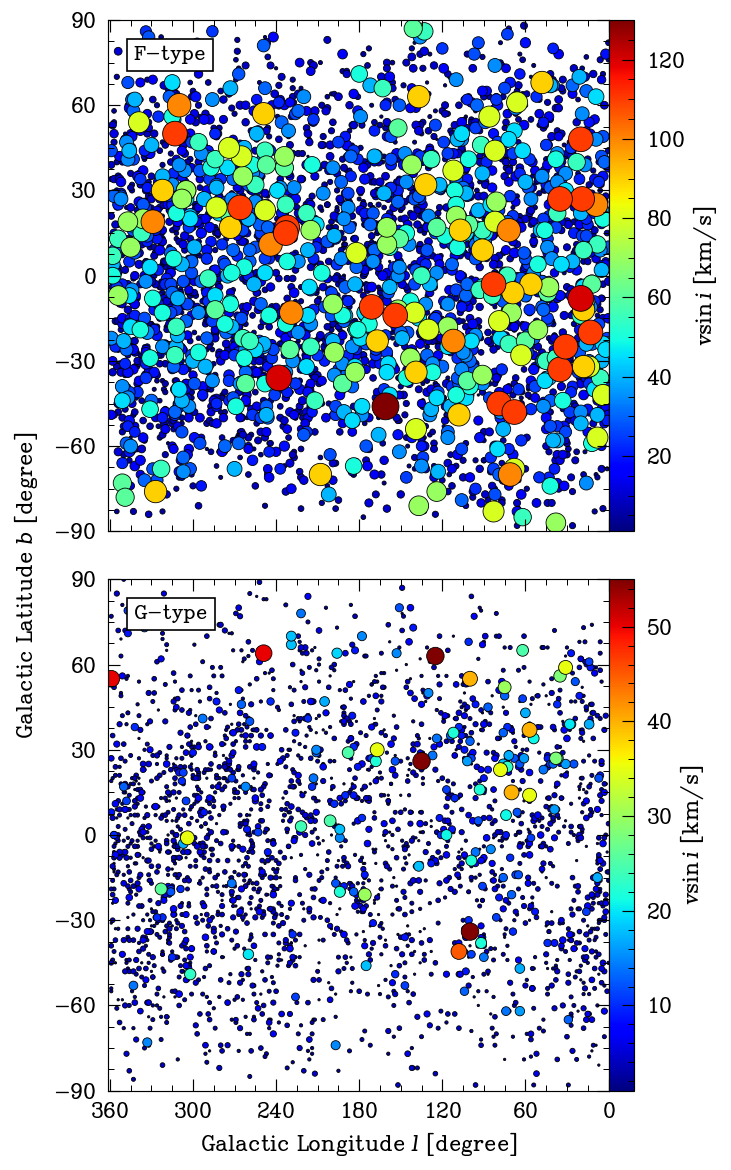

In [12]:
def sort_data_by_vsini(dataframe):
    sorted_data = dataframe.sort_values(by="vsini", ascending=True)
    return sorted_data["GLON"], sorted_data["GLAT"], sorted_data["vsini"]

glon_F, glat_F, vsini_F = sort_data_by_vsini(F)
glon_G, glat_G, vsini_G = sort_data_by_vsini(G)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10), sharex=True, sharey=True)

def plot1(glon, glat, vsini, label, ax, scaler=2):
    scatter = ax.scatter(
        glon, glat, s=vsini * scaler, c=vsini,
        cmap="jet", ec="k", lw=0.5,
    )
    ax.set(xlim=(361, 0), ylim=(-90, 90))  
    ax.set_xticks([360, 300, 240, 180, 120, 60, 0]) 
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])   
    ax.text(0.05, 0.95, label, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    return scatter

scatter_F = plot1(glon_F, glat_F, vsini_F, "F-type", ax1)
scatter_G = plot1(glon_G, glat_G, vsini_G, "G-type", ax2)

ax2.set(xlabel="Galactic Longitude $l$ [degree]")
fig.text(-0.02, 0.5, "Galactic Latitude $b$ [degree]", va='center', rotation='vertical')

# Add colorbars
plt.colorbar(scatter_F, ax=ax1, pad=0).set_label(r"$v\sin i$ [km/s]")
plt.colorbar(scatter_G, ax=ax2, pad=0).set_label(r"$v\sin i$ [km/s]")

plt.tight_layout()
plt.savefig(f"{OUTDIR}/fig1_FG.png", bbox_inches="tight", dpi=400)
print(f">> Image successfully saved as 'fig1_FG.png' in {OUTDIR} folder")

## FIGURE 2

>> Image successfully saved as 'fig2_FG.png' in figures folder


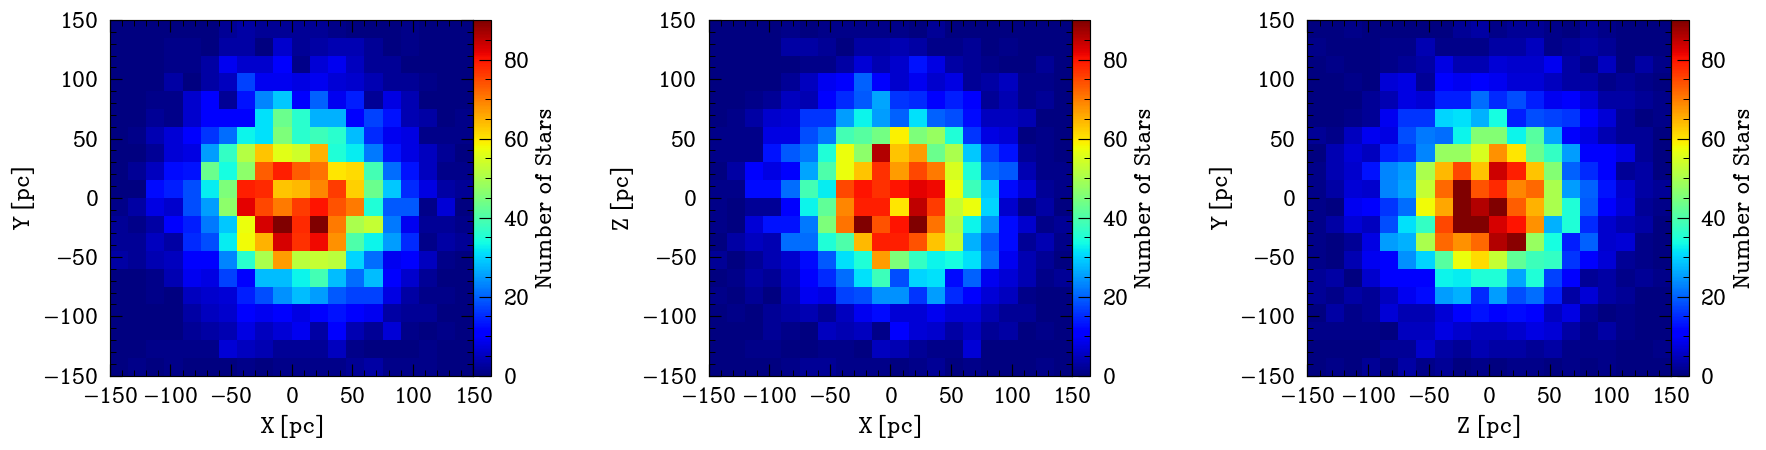

In [13]:
x = ALL["X"]
y = ALL["Y"]
z = ALL["Z"]

bins = 20           # 20x20 pc² pixels
vmin, vmax = 0, 90  # Colobar limits (40 stars into the pixel)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

data_pairs = [
    (x, y, 'X [pc]', 'Y [pc]'),
    (x, z, 'X [pc]', 'Z [pc]'),
    (z, y, 'Z [pc]', 'Y [pc]')
]

for ax, (data1, data2, xlabel, ylabel) in zip(axs, data_pairs):
    hist, xedges, yedges = np.histogram2d(data1, data2, bins=bins, range=[[-150, 150], [-150, 150]])
    cax = ax.pcolormesh(xedges, yedges, hist.T, cmap='jet', vmin=vmin, vmax=vmax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(-150, 150)
    ax.set_ylim(-150, 150)
    ax.set_xticks([-150, -100, -50, 0, 50, 100, 150]) 
    ax.set_yticks([-150, -100, -50, 0, 50, 100, 150])   
    ax.set_facecolor(plt.cm.jet(0))
    fig.colorbar(cax, ax=ax, label='Number of Stars', pad=0)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.savefig(f"{OUTDIR}/fig2_ALL.png", bbox_inches="tight", dpi=400)
print(f">> Image successfully saved as 'fig2_FG.png' in {OUTDIR} folder")

## VSINI FIGURES

In [38]:
DATA_SELECTION = 'G'          # Options: 'F', 'G', 'ALL'
PLANE = 'ZY'                    # Options: 'XY', 'XZ', 'ZY'

In [39]:
if DATA_SELECTION == 'F':
    data = F
elif DATA_SELECTION == 'G':
    data = G
elif DATA_SELECTION == 'ALL':
    data = ALL
else:
    raise ValueError("Invalid data selection. Choose 'F', 'G', or 'ALL'.")

# Extract variables based on plane
if PLANE == 'XY':
    x = data["X"]
    y = data["Y"]
elif PLANE == 'XZ':
    x = data["X"]
    y = data["Z"]
elif PLANE == 'ZY':
    x = data["Z"]
    y = data["Y"]
else:
    raise ValueError("Invalid plane selection. Choose 'XY', 'XZ', or 'ZY'.")

vsini = data['vsini']
DPtotal = np.std(vsini)

ttx = np.arange(-UL, UL + INTERVAL * TC, INTERVAL * TC)
tty = np.arange(-UL, UL + INTERVAL * TC, INTERVAL * TC)
Nx = len(ttx) - 1
Ny = len(tty) - 1

# Initialize arrays
meanbootstrap = np.zeros((Ny, Nx))
meanbootstrapSD = np.zeros((Ny, Nx))
percentile25boot = np.zeros((Ny, Nx))
percentile50boot = np.zeros((Ny, Nx))
percentile75boot = np.zeros((Ny, Nx))

meanoriginal = np.zeros((Ny, Nx))
meanoriginalSD = np.zeros((Ny, Nx))
percentile25 = np.zeros((Ny, Nx))
percentile50 = np.zeros((Ny, Nx))
percentile75 = np.zeros((Ny, Nx))

boot_mean = np.zeros((Ny, Nx))
boot_se = np.zeros((Ny, Nx))
ci1 = np.zeros((Ny, Nx))
ci2 = np.zeros((Ny, Nx))
shape = np.zeros((Ny, Nx))
countfXY = np.zeros((Ny, Nx))

for j in range(Nx):
    for i in range(Ny):
        condition = (
            (ttx[j] <= x) & (x < ttx[j + 1]) &
            (tty[i] <= y) & (y < tty[i + 1])
        )
        vsini_condition = vsini[condition]
        count = len(vsini_condition)
        countfXY[i, j] = count

        if count >= 20:
            # Calculate statistics for original data
            meanoriginal[i, j] = np.mean(vsini_condition)
            meanoriginalSD[i, j] = np.std(vsini_condition)
            percentile25[i, j] = np.percentile(vsini_condition, 25)
            percentile50[i, j] = np.percentile(vsini_condition, 50)
            percentile75[i, j] = np.percentile(vsini_condition, 75)

            # Generate bootstrap samples
            samples = bootrsp(vsini_condition.values, B)  # Shape: [N, B]
            bootout = np.array([trimmean2(samples[:, b], TRIMPCT) for b in range(B)])

            # Compute bootstrap statistics
            #boot_true = trimmean2(vsini_condition, TRIMPCT)
            boot_mean[i, j] = np.mean(bootout)
            boot_se[i, j] = np.std(bootout)
            meanbootstrap[i, j] = boot_mean[i, j]
            meanbootstrapSD[i, j] = boot_se[i, j]

            # Compute confidence intervals
            lower_percentile = (ALPHA / 2) * 100
            upper_percentile = (1 - ALPHA / 2) * 100
            ci1[i, j] = np.percentile(bootout, lower_percentile)
            ci2[i, j] = np.percentile(bootout, upper_percentile)

            # Percentiles for bootstrap samples
            percentile25boot[i, j] = np.percentile(bootout, 25)
            percentile50boot[i, j] = np.percentile(bootout, 50)
            percentile75boot[i, j] = np.percentile(bootout, 75)

# Calculate shape and length indices
length = ci2 - ci1
shape = (ci2 - boot_mean) / (boot_mean - ci1)
shape = np.nan_to_num(shape)  # Replace NaN with zero

# Print completion message
print("\n##### Bootstrap and grid analysis completed. #####")


##### Bootstrap and grid analysis completed. #####


In [40]:
data_dict1 = {
    r'$\langle v \sin i \rangle$ [km/s] of original sample': meanoriginal,
    r'$v \sin i$ [km/s] (q = 1/4)': percentile25,
    r'$v \sin i$ [km/s] (q = 1/2)': percentile50,
    r'$v \sin i$ [km/s] (q = 3/4)': percentile75
}

data_dict2 = {
    r'$\langle v \sin i \rangle$ [km/s]' + '\n' + 'of bootstrap resampling': meanbootstrap,
    r'$v \sin i$ [km/s]' + '\n' + 'of bootstrap resampling (q=1/4)': percentile25boot,
    r'$v \sin i$ [km/s]' + '\n' + 'of bootstrap resampling (q=1/2)': percentile50boot,
    r'$v \sin i$ [km/s]' + '\n' + 'of bootstrap resampling (q=3/4)': percentile75boot
}

plotfig_combined(data_dict1, data_dict2, UL, PLANE, DATA_SELECTION, figure_number=3, OUTDIR=OUTDIR)

>> Image successfully saved as 'fig3_G_ZY_combined.png' in figures folder


# AGE FIGURES

In [51]:
DATA_SELECTION = 'G'          # Options: 'F', 'G', 'ALL'
PLANE = 'ZY'                    # Options: 'XY', 'XZ', 'ZY'

if DATA_SELECTION == 'F':
    data = F
elif DATA_SELECTION == 'G':
    data = G
elif DATA_SELECTION == 'ALL':
    data = ALL
else:
    raise ValueError("Invalid data selection. Choose 'F', 'G', or 'ALL'.")

# Extract variables based on plane
if PLANE == 'XY':
    x = data["X"]
    y = data["Y"]
elif PLANE == 'XZ':
    x = data["X"]
    y = data["Z"]
elif PLANE == 'ZY':
    x = data["Z"]
    y = data["Y"]
else:
    raise ValueError("Invalid plane selection. Choose 'XY', 'XZ', or 'ZY'.")

vsini = data['Age']
DPtotal = np.std(vsini)

ttx = np.arange(-UL, UL + INTERVAL * TC, INTERVAL * TC)
tty = np.arange(-UL, UL + INTERVAL * TC, INTERVAL * TC)
Nx = len(ttx) - 1
Ny = len(tty) - 1

# Initialize arrays
meanbootstrap = np.zeros((Ny, Nx))
meanbootstrapSD = np.zeros((Ny, Nx))
percentile25boot = np.zeros((Ny, Nx))
percentile50boot = np.zeros((Ny, Nx))
percentile75boot = np.zeros((Ny, Nx))

meanoriginal = np.zeros((Ny, Nx))
meanoriginalSD = np.zeros((Ny, Nx))
percentile25 = np.zeros((Ny, Nx))
percentile50 = np.zeros((Ny, Nx))
percentile75 = np.zeros((Ny, Nx))

boot_mean = np.zeros((Ny, Nx))
boot_se = np.zeros((Ny, Nx))
ci1 = np.zeros((Ny, Nx))
ci2 = np.zeros((Ny, Nx))
shape = np.zeros((Ny, Nx))
countfXY = np.zeros((Ny, Nx))

for j in range(Nx):
    for i in range(Ny):
        condition = (
            (ttx[j] <= x) & (x < ttx[j + 1]) &
            (tty[i] <= y) & (y < tty[i + 1])
        )
        vsini_condition = vsini[condition]
        count = len(vsini_condition)
        countfXY[i, j] = count

        if count >= 20:
            # Calculate statistics for original data
            meanoriginal[i, j] = np.mean(vsini_condition)
            meanoriginalSD[i, j] = np.std(vsini_condition)
            percentile25[i, j] = np.percentile(vsini_condition, 25)
            percentile50[i, j] = np.percentile(vsini_condition, 50)
            percentile75[i, j] = np.percentile(vsini_condition, 75)

            # Generate bootstrap samples
            samples = bootrsp(vsini_condition.values, B)  # Shape: [N, B]
            bootout = np.array([trimmean2(samples[:, b], TRIMPCT) for b in range(B)])

            # Compute bootstrap statistics
            #boot_true = trimmean2(vsini_condition, TRIMPCT)
            boot_mean[i, j] = np.mean(bootout)
            boot_se[i, j] = np.std(bootout)
            meanbootstrap[i, j] = boot_mean[i, j]
            meanbootstrapSD[i, j] = boot_se[i, j]

            # Compute confidence intervals
            lower_percentile = (ALPHA / 2) * 100
            upper_percentile = (1 - ALPHA / 2) * 100
            ci1[i, j] = np.percentile(bootout, lower_percentile)
            ci2[i, j] = np.percentile(bootout, upper_percentile)

            # Percentiles for bootstrap samples
            percentile25boot[i, j] = np.percentile(bootout, 25)
            percentile50boot[i, j] = np.percentile(bootout, 50)
            percentile75boot[i, j] = np.percentile(bootout, 75)

# Calculate shape and length indices
length = ci2 - ci1
shape = (ci2 - boot_mean) / (boot_mean - ci1)
shape = np.nan_to_num(shape)  # Replace NaN with zero

data_dict1 = {
    r'$\langle \text{Age} \rangle$ [Gyr] of original sample': meanoriginal,
    r'Age [Gyr] (q = 1/4)': percentile25,
    r'Age [Gyr] (q = 1/2)': percentile50,
    r'Age [Gyr] (q = 3/4)': percentile75
}

data_dict2 = {
    r'$\langle Age \rangle$ [Gyr]' + '\n' + 'of bootstrap resampling': meanbootstrap,
    r'Age [Gyr]' + '\n' + 'of bootstrap resampling (q=1/4)': percentile25boot,
    r'Age [Gyr]' + '\n' + 'of bootstrap resampling (q=1/2)': percentile50boot,
    r'Age [Gyr]' + '\n' + 'of bootstrap resampling (q=3/4)': percentile75boot
}

plotfig_combined(data_dict1, data_dict2, UL, PLANE, DATA_SELECTION, figure_number="AGE", OUTDIR=OUTDIR)

>> Image successfully saved as 'figAGE_G_ZY_combined.png' in figures folder


# VSINI / RADIUS FIGURES

In [63]:
DATA_SELECTION = 'G'          # Options: 'F', 'G', 'ALL'
PLANE = 'ZY'                    # Options: 'XY', 'XZ', 'ZY'

if DATA_SELECTION == 'F':
    data = F
elif DATA_SELECTION == 'G':
    data = G
elif DATA_SELECTION == 'ALL':
    data = ALL
else:
    raise ValueError("Invalid data selection. Choose 'F', 'G', or 'ALL'.")

# Extract variables based on plane
if PLANE == 'XY':
    x = data["X"]
    y = data["Y"]
elif PLANE == 'XZ':
    x = data["X"]
    y = data["Z"]
elif PLANE == 'ZY':
    x = data["Z"]
    y = data["Y"]
else:
    raise ValueError("Invalid plane selection. Choose 'XY', 'XZ', or 'ZY'.")

vsini = data['vsin/radius'].dropna()
DPtotal = np.std(vsini)

ttx = np.arange(-UL, UL + INTERVAL * TC, INTERVAL * TC)
tty = np.arange(-UL, UL + INTERVAL * TC, INTERVAL * TC)
Nx = len(ttx) - 1
Ny = len(tty) - 1

# Initialize arrays
meanbootstrap = np.zeros((Ny, Nx))
meanbootstrapSD = np.zeros((Ny, Nx))
percentile25boot = np.zeros((Ny, Nx))
percentile50boot = np.zeros((Ny, Nx))
percentile75boot = np.zeros((Ny, Nx))

meanoriginal = np.zeros((Ny, Nx))
meanoriginalSD = np.zeros((Ny, Nx))
percentile25 = np.zeros((Ny, Nx))
percentile50 = np.zeros((Ny, Nx))
percentile75 = np.zeros((Ny, Nx))

boot_mean = np.zeros((Ny, Nx))
boot_se = np.zeros((Ny, Nx))
ci1 = np.zeros((Ny, Nx))
ci2 = np.zeros((Ny, Nx))
shape = np.zeros((Ny, Nx))
countfXY = np.zeros((Ny, Nx))

for j in range(Nx):
    for i in range(Ny):
        condition = (
            (ttx[j] <= x) & (x < ttx[j + 1]) &
            (tty[i] <= y) & (y < tty[i + 1])
        )
        vsini_condition = vsini[condition]
        count = len(vsini_condition)
        countfXY[i, j] = count

        if count >= 20:
            # Calculate statistics for original data
            meanoriginal[i, j] = np.mean(vsini_condition)
            meanoriginalSD[i, j] = np.std(vsini_condition)
            percentile25[i, j] = np.percentile(vsini_condition, 25)
            percentile50[i, j] = np.percentile(vsini_condition, 50)
            percentile75[i, j] = np.percentile(vsini_condition, 75)

            # Generate bootstrap samples
            samples = bootrsp(vsini_condition.values, B)  # Shape: [N, B]
            bootout = np.array([trimmean2(samples[:, b], TRIMPCT) for b in range(B)])

            # Compute bootstrap statistics
            #boot_true = trimmean2(vsini_condition, TRIMPCT)
            boot_mean[i, j] = np.mean(bootout)
            boot_se[i, j] = np.std(bootout)
            meanbootstrap[i, j] = boot_mean[i, j]
            meanbootstrapSD[i, j] = boot_se[i, j]

            # Compute confidence intervals
            lower_percentile = (ALPHA / 2) * 100
            upper_percentile = (1 - ALPHA / 2) * 100
            ci1[i, j] = np.percentile(bootout, lower_percentile)
            ci2[i, j] = np.percentile(bootout, upper_percentile)

            # Percentiles for bootstrap samples
            percentile25boot[i, j] = np.percentile(bootout, 25)
            percentile50boot[i, j] = np.percentile(bootout, 50)
            percentile75boot[i, j] = np.percentile(bootout, 75)

# Calculate shape and length indices
length = ci2 - ci1
shape = (ci2 - boot_mean) / (boot_mean - ci1)
shape = np.nan_to_num(shape)  # Replace NaN with zero

data_dict1 = {
    r'$\langle v\sin i / R_{\star} \rangle$ of original sample': meanoriginal,
    r'$v\sin i / R_{\star}$ (q = 1/4)': percentile25,
    r'$v\sin i / R_{\star}$ (q = 1/2)': percentile50,
    r'$v\sin i / R_{\star}$ (q = 3/4)': percentile75
}

data_dict2 = {
    r'$\langle v\sin i / R_{\star} \rangle$' + '\n' + 'of bootstrap resampling': meanbootstrap,
    r'$v\sin i / R_{\star}$' + '\n' + 'of bootstrap resampling (q=1/4)': percentile25boot,
    r'$v\sin i / R_{\star}$' + '\n' + 'of bootstrap resampling (q=1/2)': percentile50boot,
    r'$v\sin i / R_{\star}$' + '\n' + 'of bootstrap resampling (q=3/4)': percentile75boot
}

plotfig_combined(data_dict1, data_dict2, UL, PLANE, DATA_SELECTION, figure_number="VSINI_RADIUS", OUTDIR=OUTDIR)

>> Image successfully saved as 'figVSINI_RADIUS_G_ZY_combined.png' in figures folder
